**Tasks :**
1. Display the mean of any two variables with continuous values
2. Print the number of discrete variables
3. Display the unique values of two variables with discrete values
4. Display the Month with most of loans issued date
5. Display the count of ‘Teacher’ who are ‘Owners’
6. Display the ‘Employment’ of customers who mostly ‘Rent’

### **Importing Libraries :**

In [ ]:
import numpy as np 
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
loan_data=pd.read_csv("/content/loan.csv")
loan_data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [ ]:
loan_data.shape

(10000, 14)

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             10000 non-null  int64  
 1   disbursed_amount        10000 non-null  float64
 2   interest                10000 non-null  float64
 3   market                  10000 non-null  object 
 4   employment              9389 non-null   object 
 5   time_employed           9471 non-null   object 
 6   householder             10000 non-null  object 
 7   income                  10000 non-null  float64
 8   date_issued             10000 non-null  object 
 9   target                  10000 non-null  int64  
 10  loan_purpose            10000 non-null  object 
 11  number_open_accounts    10000 non-null  float64
 12  date_last_payment       10000 non-null  object 
 13  number_credit_lines_12  238 non-null    float64
dtypes: float64(5), int64(2), object(7)
memo

### **TASK 1:**

Display the mean of any two variables with continuous values

**Note :** Here , I consider disbursed amount and interest as two variables with continuous values.

In [ ]:
def mean(col):
  mean=loan_data[col].mean()
  return mean 

print("Mean of disbursed amount feature : ",mean('disbursed_amount'))
print("Mean of interest feature : ",mean('interest'))

Mean of distributed amount feature :  14132.2755
Mean of interest feature :  12.678819440000039


### **TASK 2:**
Print the number of discrete variables

In [ ]:
loan_data.describe(include=['int64','float64'])

,customer_id,disbursed_amount,interest,income,target,number_open_accounts,number_credit_lines_12
count,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,238.000000
mean,4999.50000,14132.275500,12.678819,7.157229e+04,0.011700,12.516300,1.785714
std,2886.89568,8058.310311,4.214989,5.286105e+04,0.107537,5.402615,1.197873
min,0.00000,910.000000,4.841200,0.000000e+00,0.000000,1.000000,0.000000
25%,2499.75000,7840.000000,9.490000,4.365000e+04,0.000000,9.000000,1.000000
50%,4999.50000,12375.000000,12.396900,6.045000e+04,0.000000,12.000000,2.000000
75%,7499.25000,19200.000000,15.475500,8.536000e+04,0.000000,15.000000,2.000000
max,9999.00000,35000.000000,27.880000,2.185000e+06,1.000000,49.000000,6.000000


**Inference :** 
1. From the above statistics, we know that customer id is just the unique id and that doesn't fall under discrete variables.

2. disbursed_amount, interest, income falls under continuous numerical features.

3. Therefore, we take other 3 features namely 'target','number_open_accounts','number_credit_lines_12' to check if it is discrete features or not.

In [ ]:
discrete_varibale=['target','number_open_accounts','number_credit_lines_12']
for col in discrete_varibale:
  print("Discrete column : ",col)
  print("Number of discrete values the feature can take :",len(loan_data[col].value_counts()))
  print("\n")

Discrete column :  target
Number of discrete values the feature can take : 2


Discrete column :  number_open_accounts
Number of discrete values the feature can take : 45


Discrete column :  number_credit_lines_12
Number of discrete values the feature can take : 7




### **Inference :** 
The above 3 features such as 'target','number_open_accounts','number_credit_lines_12' takes discrete values and therefore these can be treated as discrete variables.

In [ ]:
print("Number of discrete variables : ",len(discrete_varibale))

Number of discrete variables :  3


### **TASK 4:**
Display the Month with most of loans issued date

In [ ]:
# converting date_issued feature from object to datetime 
loan_data['date_issued']= pd.to_datetime(loan_data['date_issued'])
loan_data['Month_loan_issued']=loan_data['date_issued'].dt.month
loan_data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,Month_loan_issued
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN,6
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN,5
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN,10
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN,8
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN,7


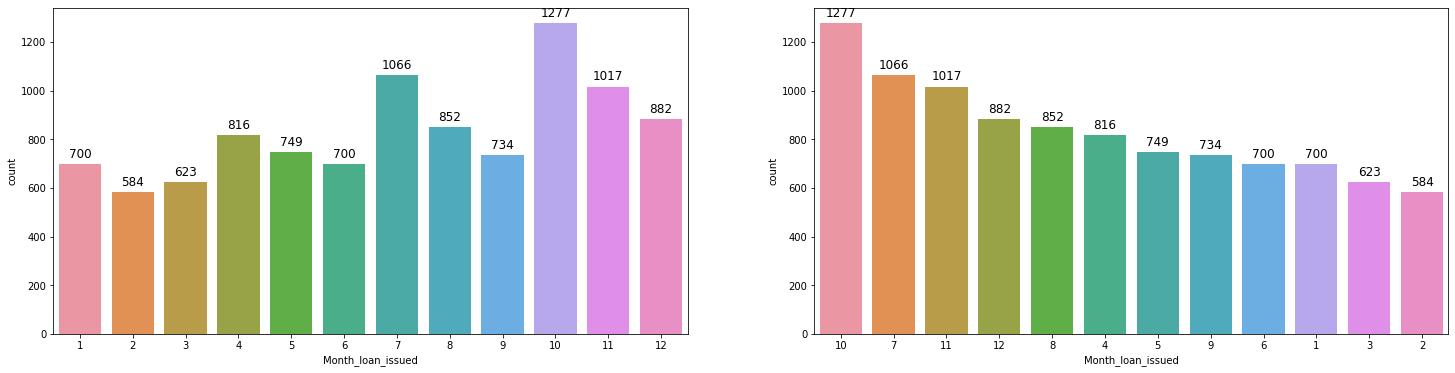

In [33]:
def display_plots(col):
  fig, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(25,6)) # figure of 2 rows and 3 columns subplots 
  ax1=sns.countplot(x=col,data=loan_data,ax=ax1)
  for p in ax1.patches:
    ax1.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
  ax2=sns.countplot(x=col,data=loan_data,order=loan_data[col].value_counts().index,ax=ax2)
  for p in ax2.patches:
    ax2.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
  plt.show()

display_plots('Month_loan_issued')

**Inference :** 

From the sorted subplot 2, it is clear that month 10 i.e October is the month in which lot of loans were issued. There are 1277 loan issues happened in the month of october (Month 10). 

### **TASK 5:**
Display the count of ‘Teacher’ who are ‘Owners’

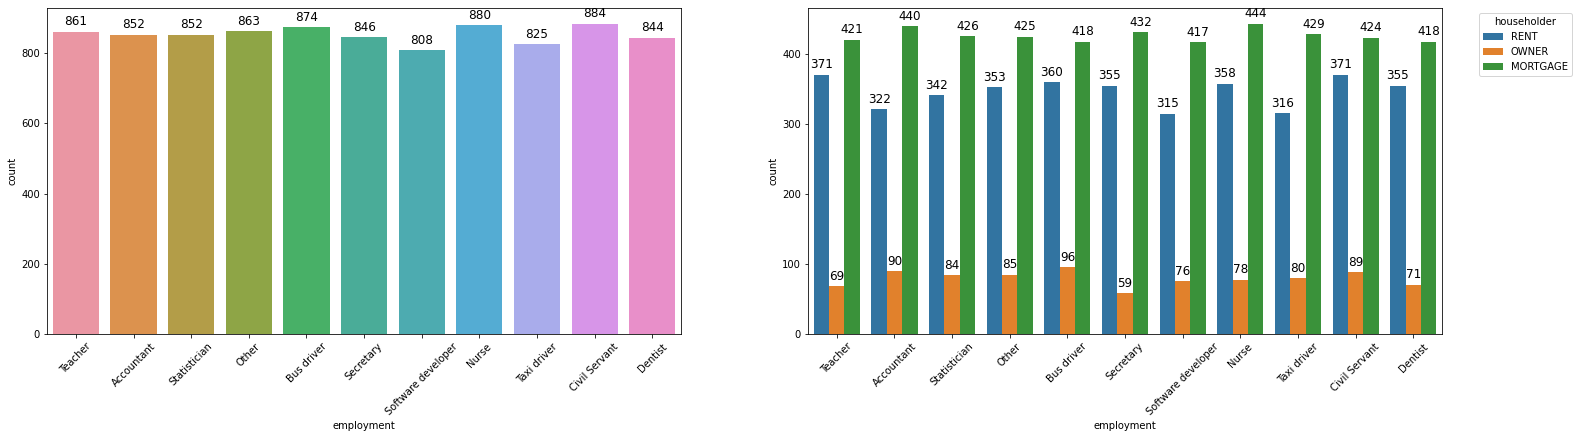

In [43]:
def display_plots2(col1,col2):
  fig, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(25,6)) # figure of 2 rows and 3 columns subplots 
  ax1=sns.countplot(x=col1,data=loan_data,ax=ax1)
  for p in ax1.patches:
    ax1.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
  ax1.tick_params(axis='x', rotation=45)
  ax2=sns.countplot(x=col1,data=loan_data,hue=col2,ax=ax2)
  for p in ax2.patches:
    ax2.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
  ax2.tick_params(axis='x', rotation=45)
  ax2.legend(title=col2, bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()

display_plots2('employment','householder')

### **Inference :** 

1. From subplot 1 it is clear that there are 861 teachers. 
2. From subplot 2 we can infer that out of this 861 teachers 69 are OWNER. 

Therefore, 69 teachers are OWNERS.

### **TASK 6:**
Display the ‘Employment’ of customers who mostly ‘Rent’

In [54]:
loan_data[["employment", "householder"]].value_counts(normalize=True)

employment          householder
Nurse               MORTGAGE       0.047289
Accountant          MORTGAGE       0.046863
Secretary           MORTGAGE       0.046011
Taxi driver         MORTGAGE       0.045692
Statistician        MORTGAGE       0.045372
Other               MORTGAGE       0.045266
Civil Servant       MORTGAGE       0.045159
Teacher             MORTGAGE       0.044840
Bus driver          MORTGAGE       0.044520
Dentist             MORTGAGE       0.044520
Software developer  MORTGAGE       0.044414
Civil Servant       RENT           0.039514
Teacher             RENT           0.039514
Bus driver          RENT           0.038343
Nurse               RENT           0.038130
Dentist             RENT           0.037810
Secretary           RENT           0.037810
Other               RENT           0.037597
Statistician        RENT           0.036426
Accountant          RENT           0.034295
Taxi driver         RENT           0.033656
Software developer  RENT           0.033550


**Inference :**

From the plot plotted for task 5, we can also infer that employment such as Teachers, Civil service customers mostly in Rent. We could see that 371/861 teachers were in Rent and 371//884 civil service people were in Rent.